In [2]:
from fastai import *
from fastai.tabular import *

In [3]:
bf = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/black-friday/BlackFriday.csv')#, nrows=1000)

In [4]:
bf['Purchase'] = bf['Purchase'].apply(lambda x : np.float64(x))

In [5]:
bf.head();bf.columns;bf.dtypes; bf.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664.0
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196.0
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043.0
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172.0
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875.0


In [6]:
train = bf
summ = pd.DataFrame({'Variable':train.columns.values,
                   'dtype':train.dtypes.values,
                   'n_missing':[train[col].shape[0]-train[col].dropna().shape[0] for col in train.columns],
                   'perc_missing':[(train[col].shape[0]-train[col].dropna().shape[0])*100/train[col].shape[0] for col in train.columns],
                   'unique_cnt' : [len(train[col].unique()) for col in train.columns],
                   'unique_values': [(train[col].unique()) if (len(train[col].unique())<10) else 'UniqueVals>10' for col in train.columns]},
                   index=np.arange(train.shape[1]))

In [7]:
summ

,Variable,dtype,n_missing,perc_missing,unique_cnt,unique_values
0,User_ID,int64,0,0.000000,5891,UniqueVals>10
1,Product_ID,object,0,0.000000,3623,UniqueVals>10
2,Gender,object,0,0.000000,2,"[F, M]"
3,Age,object,0,0.000000,7,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]"
4,Occupation,int64,0,0.000000,21,UniqueVals>10
5,City_Category,object,0,0.000000,3,"[A, C, B]"
6,Stay_In_Current_City_Years,object,0,0.000000,5,"[2, 4+, 3, 1, 0]"
7,Marital_Status,int64,0,0.000000,2,"[0, 1]"
8,Product_Category_1,int64,0,0.000000,18,UniqueVals>10
9,Product_Category_2,float64,166986,31.062713,18,UniqueVals>10


In [8]:
bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [9]:
bf.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
dep_var = 'Purchase'
cat_names = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Marital_Status',
                'Stay_In_Current_City_Years']
cont_names = ['Product_Category_1','Product_Category_2', 'Product_Category_3']
procs = [FillMissing, Categorify, Normalize]

In [11]:
path =Path('/mnt/datadrive1/h216520/fastai_v3/data/black-friday'); path

PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/black-friday')

In [12]:
int(bf.shape[0]*.2)/(5)

21503.0

In [13]:
data = (TabularList.from_df(bf,cat_names= cat_names, cont_names=cont_names, procs=procs, path=path)
        .split_by_idx(list(np.random.permutation(bf.shape[0]))[:int(bf.shape[0]*.2)])
        .label_from_df(cols=dep_var,label_cls=FloatList)
#         .add_test(pubsamp_test, label=0)
        .databunch())

In [14]:
data.show_batch(10);data.show_batch(10, DatasetType=DatasetType.Valid)

User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,Product_Category_2_na,Product_Category_3_na,Product_Category_1,Product_Category_2,Product_Category_3,target
1004218,P00000742,M,51-55,17,C,1,2,False,True,-0.0789,1.0424,0.1723,8585.0
1002641,P00086442,M,26-35,6,C,1,1,False,False,0.7208,0.8066,0.5958,7788.0
1002156,P00194442,M,18-25,19,C,0,4+,True,True,-0.0789,-0.1365,0.1723,6986.0
1005771,P00113142,M,26-35,7,A,0,1,False,False,-1.1452,-1.0796,-0.6746,15237.0
1003769,P00284642,M,26-35,15,B,0,0,False,True,-0.0789,-0.3723,0.1723,7123.0
1002018,P00227642,M,36-45,16,B,0,1,False,False,-1.1452,-1.0796,0.1723,4103.0
1006006,P00189842,F,0-17,0,C,0,1,False,False,-0.6120,-1.3154,-3.6390,11075.0
1004962,P00020242,M,26-35,6,B,0,1,False,True,0.7208,1.0424,0.1723,5911.0
1005676,P00117042,M,26-35,20,C,0,0,False,False,-1.1452,-1.7870,-3.6390,15220.0
1003590,P00284142,F,18-25,15,A,0,1,False,True,-0.6120,-1.3154,0.1723,8142.0


User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,Product_Category_2_na,Product_Category_3_na,Product_Category_1,Product_Category_2,Product_Category_3,target
1004368,P00355142,M,18-25,17,B,0,1,False,True,-1.1452,1.2782,0.1723,15270.0
1000485,P00296042,M,55+,7,C,1,2,False,False,0.7208,0.8066,1.0193,8036.0
1005219,P00093342,M,18-25,4,B,1,2,False,False,-1.1452,-0.3723,1.8662,8338.0
1004083,P00192842,M,55+,14,A,0,0,False,True,-0.0789,1.0424,0.1723,3464.0
1003391,P00030842,M,18-25,4,A,0,0,False,False,-1.1452,-1.7870,0.5958,15545.0
1001294,P00019042,F,51-55,20,B,1,4+,False,False,-0.0789,-0.3723,0.1723,5466.0
1000770,P00251942,M,18-25,4,B,1,2,False,False,-1.1452,-1.7870,-3.6390,11826.0
1004680,P00224742,M,36-45,0,B,1,3,True,True,0.7208,-0.1365,0.1723,4070.0
1003365,P00241242,M,51-55,17,C,1,3,False,False,-1.1452,0.3351,0.5958,11918.0
1000327,P00332342,M,36-45,18,C,0,4+,False,True,-0.0789,-0.3723,0.1723,5156.0


In [19]:
learn = tabular_learner(data, layers=[50, 50])#, emb_szs={'n_cat':5})#, metrics=)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


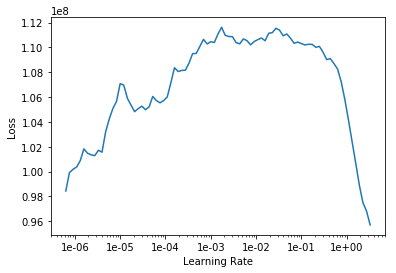

In [20]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5,1e-3, wd=0.2, pct_start=0.2)

epoch,train_loss,valid_loss


In [46]:
data.train_dl.one_batch()[0][0], data.train_dl.one_batch()[0][1], data.train_dl.one_batch()[1].shape

(tensor([[2677, 2744,    1,  ...,    2,    1,    2],
         [5882, 1080,    1,  ...,    2,    1,    2],
         [2841,  212,    2,  ...,    3,    2,    2],
         ...,
         [3346, 1696,    2,  ...,    4,    1,    2],
         [5418, 1201,    2,  ...,    1,    1,    1],
         [1920,    6,    2,  ...,    1,    1,    1]], device='cuda:0'),
 tensor([[-1.1454,  1.2769,  0.1723],
         [ 0.1886,  1.5126,  0.1723],
         [-1.1454, -1.7872, -2.3684],
         ...,
         [-1.1454, -1.0801, -0.6746],
         [-0.0782, -0.1373,  0.1723],
         [-0.0782, -0.1373,  0.1723]], device='cuda:0'),
 torch.Size([512]))

In [61]:
data.train_dl.one_batch()[0][0].shape, data.train_dl.one_batch()[0][1].shape, data.train_dl.one_batch()[1].shape

(torch.Size([64, 10]), torch.Size([64, 3]), torch.Size([64]))

In [62]:
data.train_dl.batch_size

64

In [81]:
tabular_learner??